In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv(
    Path('Resources/lending_data.csv')   
)

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = df['loan_status']

# Separate the X variable, the features
X = df.drop(columns='loan_status')

In [4]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [6]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
# Import the StandardScaler module
from sklearn.preprocessing import StandardScaler

# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr_model = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using training data
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
predictions = lr_model.predict(X_test_scaled)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [10]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [11]:
# Print the classification report for the model
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,18652,113
Actual 1,9,610


Accuracy Score : 0.9937061494015683
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Feature Importance

In this section, you are asked to fetch the features' importance from the random forest model and display the top 10 most important features.

            Feature  Coefficient  Absolute Coefficient
3    debt_to_income     8.510279              8.510279
4   num_of_accounts    -0.873690              0.873690
6        total_debt    -0.675715              0.675715
2   borrower_income    -0.675715              0.675715
1     interest_rate    -0.662862              0.662862
0         loan_size    -0.533836              0.533836
5  derogatory_marks     0.152887              0.152887


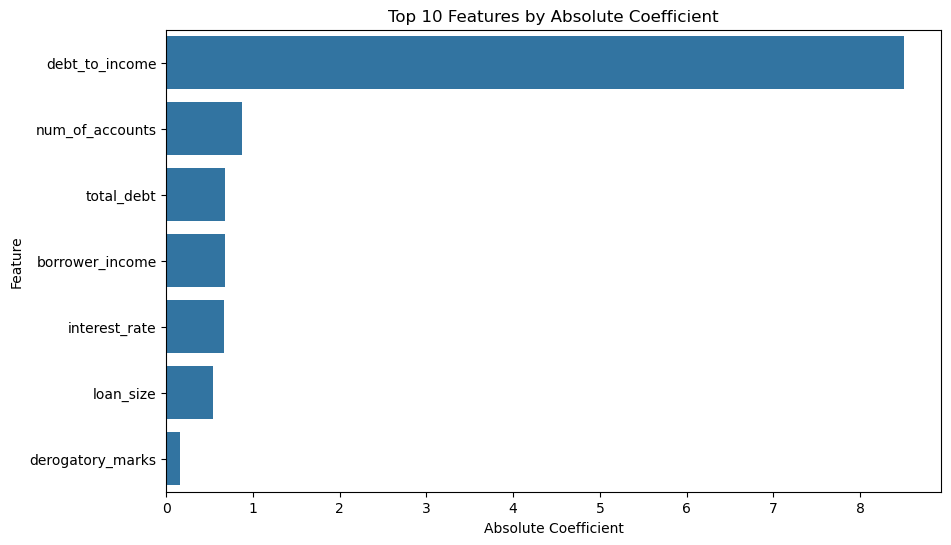

In [12]:
# Get the coefficients
coefficients = lr_model.coef_[0]

# Create a DataFrame for the coefficients
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficients
feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top 10 features by absolute coefficient
print(feature_importance_df.head(10))

# Visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='Absolute Coefficient', y='Feature')
plt.title('Top 10 Features by Absolute Coefficient')
plt.show()

### Step 5: Visualizations

In [14]:
# Use the roc_curve function to calculate the false positive rates, true positive rates, and thresholds.
# Get probabilities for the positive class
y_scores = lr_model.predict_proba(X_test_scaled)[:, 1]

# Use the roc_curve function to calculate the false positive rates, true positive rates, and thresholds.
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the Aarea under curve to quantify the overall performance of the model.
roc_auc = auc(fpr, tpr)

# Print the AUC score
print("AUC:", roc_auc)

AUC: 0.9938943836852973


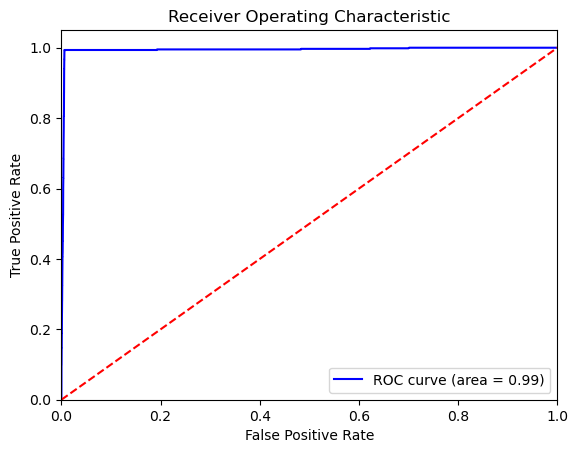

In [15]:
#Plot the ROC curve using matplotlib.
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Step 6: Answer the following questions.

**Question 1:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The accuracy score is ~99%, which means that the model correctly identifies 99% of healthy and high-risk loans. The precision for "0" (healthy loans) is 100%, meaning all predicted healthy loans are healthy and the precision for "1" (high-risk loans) is 84%, so only 84% of high-risk loans were actually high-risk. In summary, the model is a good predictor for healthy versus high-risk loans overall, though it is better at predicting healthy loans.

**Question 2:** What are your insights about the features?

**Sample Answer:** The debt-to-income ratio is the most influential feature in the model, significantly impacting the prediction of loan risk. The other features also contribute to the model's decisions, but their effects are comparatively smaller. This positive coefficient indicates that as the debt-to-income ratio increases, the likelihood of a loan being classified as high-risk (Class 1) also increases significantly. This suggests that higher debt relative to income is a strong indicator of potential loan default.

---